In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
births = pd.read_csv('births.csv')

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [9]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 *(quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5  * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
# births_by_date.head()
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

/home/kindleeldnik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # Remove the CWD from sys.path while we load stuff.


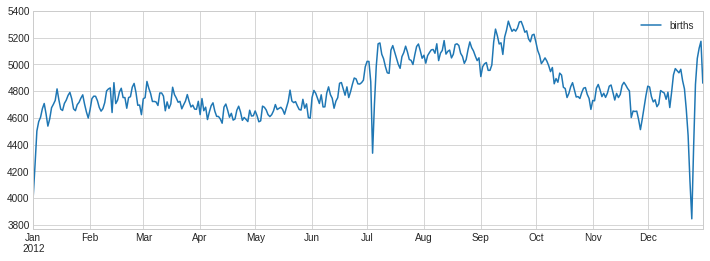

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

Text(0.2,0.2,'. Figure: (0.2, 0.2)')

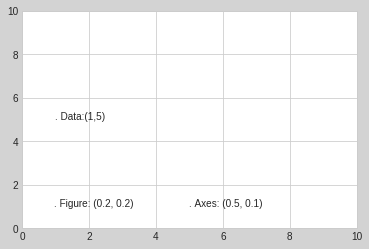

In [17]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data:(1,5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

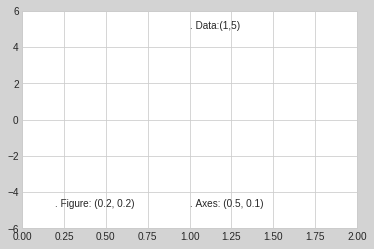

In [18]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

Text(2,-6,'local mininum')

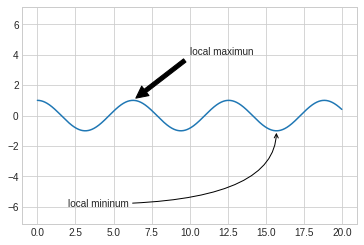

In [23]:
%matplotlib inline
fig, ax = plt.subplots()

x = np.linspace(0, 20, 10000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximun', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local mininum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))